# Setup

### Environment setup

All required packages can be found in the accompanying requirements.txt file.

In [ ]:
!pip install -r requirements.txt

### Data download

To download the dataset required for this project, we use `opendatasets` which is a Python library that simplifies the process of downloading datasets from online sources like Kaggle.


Before running the next cell, you will need to visit [Kaggle](https://www.kaggle.com/) and obtain your API token. Over there, navigate to your account's settings where you will see an API section. Create a new API token and open the kaggle.json file produced. In here, you will find your username and key which will be prompted for when you run the next cell.

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents")

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


# Exploration

The downloaded dataset has a size of 3.06 GB as of July 2024. This data size is less than the memory size of most machines. Although this data size is manageable for most machines, the memory requirement can exceed the dataset size several times during compute-intensive steps such as preprocessing, training, and inference. Additionally, the US Accidents dataset uses multiple APIs to regularly keep itself up-to-date, implying the dataset size and the consequent memory requirement will continue to grow.

With this in mind, we have decided to to use PySpark for data exploration, data preprocessing, and model training, while occasionally sampling a subset of the data to create visualizations using Pandas, Seaborn, and/or Matplotlib.

### Creating a PySpark session and loading the dataset

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .config("spark.driver.memory", "16g") \
    .config("spark.executor.memory", "16g") \
    .config('spark.executor.instances', 7) \
    .getOrCreate()

In [ ]:
path = "us-accidents/US_Accidents_March23.csv"
df = spark.read.csv(path, header=True, inferSchema=True)

### Basic EDA

Before we use PySpark to perform basic EDA operations to understand the dataset, here are the column descriptions provided by the dataset owners in the accompanying [arXiv paper](https://arxiv.org/pdf/2402.15809).

<table>
  <tr>
    <th>ID</th>
    <td>This is a unique identifier of the accident record.</td>
  </tr>
  <tr>
    <th>Source</th>
    <td>Source of raw accident data.</td>
  </tr>
  <tr>
    <th>Severity</th>
    <td>Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).</td>
  </tr>
  <tr>
    <th>Start_Time</th>
    <td>Shows start time of the accident in local time zone.</td>
  </tr>
  <tr>
    <th>End_Time</th>
    <td>Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.</td>
  </tr>
  <tr>
    <th>Start_Lat</th>
    <td>Shows latitude in GPS coordinate of the start point.</td>
  </tr>
  <tr>
    <th>Start_Lng</th>
    <td>Shows longitude in GPS coordinate of the start point.</td>
  </tr>
  <tr>
    <th>End_Lat</th>
    <td>Shows latitude in GPS coordinate of the end point.</td>
  </tr>
  <tr>
    <th>End_Lng</th>
    <td>Shows longitude in GPS coordinate of the end point.</td>
  </tr>
  <tr>
    <th>Distance(mi)</th>
    <td>The length of the road extent affected by the accident in miles.</td>
  </tr>
  <tr>
    <th>Description</th>
    <td>Shows a human provided description of the accident.</td>
  </tr>
  <tr>
    <th>Street</th>
    <td>Shows the street name in address field.</td>
  </tr>
  <tr>
    <th>City</th>
    <td>Shows the city in address field.</td>
  </tr>
  <tr>
    <th>County</th>
    <td>Shows the county in address field.</td>
  </tr>
  <tr>
    <th>State</th>
    <td>Shows the state in address field.</td>
  </tr>
  <tr>
    <th>Zipcode</th>
    <td>Shows the zipcode in address field.</td>
  </tr>
  <tr>
    <th>Country</th>
    <td>Shows the country in address field.</td>
  </tr>
  <tr>
    <th>Timezone</th>
    <td>Shows timezone based on the location of the accident (eastern, central, etc.).</td>
  </tr>
  <tr>
    <th>Airport_Code</th>
    <td>Denotes an airport-based weather station which is the closest one to location of the accident.</td>
  </tr>
  <tr>
    <th>Weather_Timestamp</th>
    <td>Shows the time-stamp of weather observation record (in local time).</td>
  </tr>
  <tr>
    <th>Temperature(F)</th>
    <td>Shows the temperature (in Fahrenheit).</td>
  </tr>
  <tr>
    <th>Wind_Chill(F)</th>
    <td>Shows the wind chill (in Fahrenheit).</td>
  </tr>
  <tr>
    <th>Humidity(%)</th>
    <td>Shows the humidity (in percentage).</td>
  </tr>
  <tr>
    <th>Pressure(in)</th>
    <td>Shows the air pressure (in inches).</td>
  </tr>
  <tr>
    <th>Visibility(mi)</th>
    <td>Shows visibility (in miles).</td>
  </tr>
  <tr>
    <th>Wind_Direction</th>
    <td>Shows wind direction.</td>
  </tr>
  <tr>
    <th>Wind_Speed(mph)</th>
    <td>Shows wind speed (in miles per hour).</td>
  </tr>
  <tr>
    <th>Precipitation(in)</th>
    <td>Shows precipitation amount in inches, if there is any.</td>
  </tr>
  <tr>
    <th>Weather_Condition</th>
    <td>Shows the weather condition (rain, snow, thunderstorm, fog, etc.).</td>
  </tr>
  <tr>
    <th>Amenity</th>
    <td>A POI annotation which indicates presence of amenity in a nearby location.</td>
  </tr>
  <tr>
    <th>Bump</th>
    <td>A POI annotation which indicates presence of speed bump or hump in a nearby location.</td>
  </tr>
  <tr>
    <th>Crossing</th>
    <td>A POI annotation which indicates presence of crossing in a nearby location.</td>
  </tr>
  <tr>
    <th>Give_Way</th>
    <td>A POI annotation which indicates presence of give_way in a nearby location.</td>
  </tr>
  <tr>
    <th>Junction</th>
    <td>A POI annotation which indicates presence of junction in a nearby location.</td>
  </tr>
  <tr>
    <th>No_Exit</th>
    <td>A POI annotation which indicates presence of no_exit in a nearby location.</td>
  </tr>
  <tr>
    <th>Railway</th>
    <td>A POI annotation which indicates presence of railway in a nearby location.</td>
  </tr>
  <tr>
    <th>Roundabout</th>
    <td>A POI annotation which indicates presence of roundabout in a nearby location.</td>
  </tr>
  <tr>
    <th>Station</th>
    <td>A POI annotation which indicates presence of station in a nearby location.</td>
  </tr>
  <tr>
    <th>Stop</th>
    <td>A POI annotation which indicates presence of stop in a nearby location.</td>
  </tr>
  <tr>
    <th>Traffic_Calming</th>
    <td>A POI annotation which indicates presence of traffic_calming in a nearby location.</td>
  </tr>
  <tr>
    <th>Traffic_Signal</th>
    <td>A POI annotation which indicates presence of traffic_signal in a nearby location.</td>
  </tr>
  <tr>
    <th>Turning_Loop</th>
    <td>A POI annotation which indicates presence of turning_loop in a nearby location.</td>
  </tr>
  <tr>
    <th>Sunrise_Sunset</th>
    <td>Shows the period of day (i.e. day or night) based on sunrise/sunset.</td>
  </tr>
  <tr>
    <th>Civil_Twilight</th>
    <td>Shows the period of day (i.e. day or night) based on civil twilight.</td>
  </tr>
  <tr>
    <th>Nautical_Twilight</th>
    <td>Shows the period of day (i.e. day or night) based on nautical twilight.</td>
  </tr>
  <tr>
    <th>Astronomical_Twilight</th>
    <td>Shows the period of day (i.e. day or night) based on astronomical twilight.</td>
  </tr>
</table>

In [ ]:
df.count()

7728394

In [ ]:
len(df.columns)

46

In [ ]:
df.show(5)

+---+-------+--------+-------------------+-------------------+-----------------+------------------+-------+-------+------------+--------------------+--------------------+------------+----------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID| Source|Severity|         Start_Time|           End_Time|        Start_Lat|         Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|              Street|        City|    County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Ameni

In [ ]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: timestamp (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- V

In [ ]:
df.describe().show()

+-------+--------+-------+------------------+-----------------+------------------+-----------------+------------------+------------------+--------------------+------------------+----------+---------+-------+------------------+-------+----------+------------+------------------+-----------------+------------------+------------------+-----------------+--------------+-----------------+--------------------+------------------+--------------+--------------+-----------------+---------------------+
|summary|      ID| Source|          Severity|        Start_Lat|         Start_Lng|          End_Lat|           End_Lng|      Distance(mi)|         Description|            Street|      City|   County|  State|           Zipcode|Country|  Timezone|Airport_Code|    Temperature(F)|    Wind_Chill(F)|       Humidity(%)|      Pressure(in)|   Visibility(mi)|Wind_Direction|  Wind_Speed(mph)|   Precipitation(in)| Weather_Condition|Sunrise_Sunset|Civil_Twilight|Nautical_Twilight|Astronomical_Twilight|
+-------+-

With 7728394 columns and 46 rows, this dataset is big. Since our primary goal, is to build a reliable model to predict accident severity, not all of the above column features would be relevant. Therefore, we use intuition to drop the following columns during the data preprocessing phase:

- `ID`, `Source`, `Timezone`, `Airport_Code`, `Weather_Timestamp`: these variables do not carry any information relevant to accident severity.
- `Street`, `County`, `State`, `Zipcode`, `Country`: instead of these variables, we focus instead on the variable `City` to provide the same information (`Country` is completely redundant).
- `Civil_Twilight`, `Nautical_Twilight`, `Astronomical_Twilight`: instead of these variables, we focus instead on the variable `Sunrise_Sunset` to provide the same/more relevant information.
- `Turning_Loop`: this variable is always false and provides no new information.
- `Description`: for simplicity, we drop this variable to not delve into the complexity of a natural language processing (NLP) task.

The most promising variables seem to be of the following two categories:
- Point of Interest (POI) annotations like `Amenity`, `Bump`, `Crossing`, `Give_Way`, `Junction`, `No_Exit`, `Railway`, `Roundabout`, `Station`, `Stop`, `Traffic_Calming`, and `Traffic_Calming`.
- Weather and time variables like `Weather_Timestamp`, `Temperature`, `Wind_Chill`, `Humidity`, `Pressure`, `Visibility`, `Wind_Direction`, `Wind_Speed`, `Precipitation`, and `Weather_Condition`.

In [ ]:
from pyspark.sql.functions import col, sum as _sum

missing_counts = df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_counts.show()

+---+------+--------+----------+--------+---------+---------+-------+-------+------------+-----------+------+----+------+-----+-------+-------+--------+------------+-----------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID|Source|Severity|Start_Time|End_Time|Start_Lat|Start_Lng|End_Lat|End_Lng|Distance(mi)|Description|Street|City|County|State|Zipcode|Country|Timezone|Airport_Code|Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|Civil_Twilight|Nautical_Twil

The above code cell shows the tally of missing values for each column in the dataset. There are a few variables that have more than a million missing columns (upto 3.4 million for `End_Lat` and `End_Lng`). This would mean that if we use these variables to predict severity and we drop the rows with missing values, we would end up losing a lot of valuable data. We will keep this in mind, when moving to feature selectoin and data preprocessing.

### Plots

In order to further explore some of these variable, we want to generate plots and visualizations. We will use a random sample of the PySpark dataset to generate these figures. We use a fixed seed for replication purposes.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sampled_df = df.sample(fraction=0.01, seed=1234)
pandas_df = sampled_df.toPandas()

<ipython-input-62-ec254ab849dc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_df[boolean_columns] = heatmap_df[boolean_columns].astype(int)


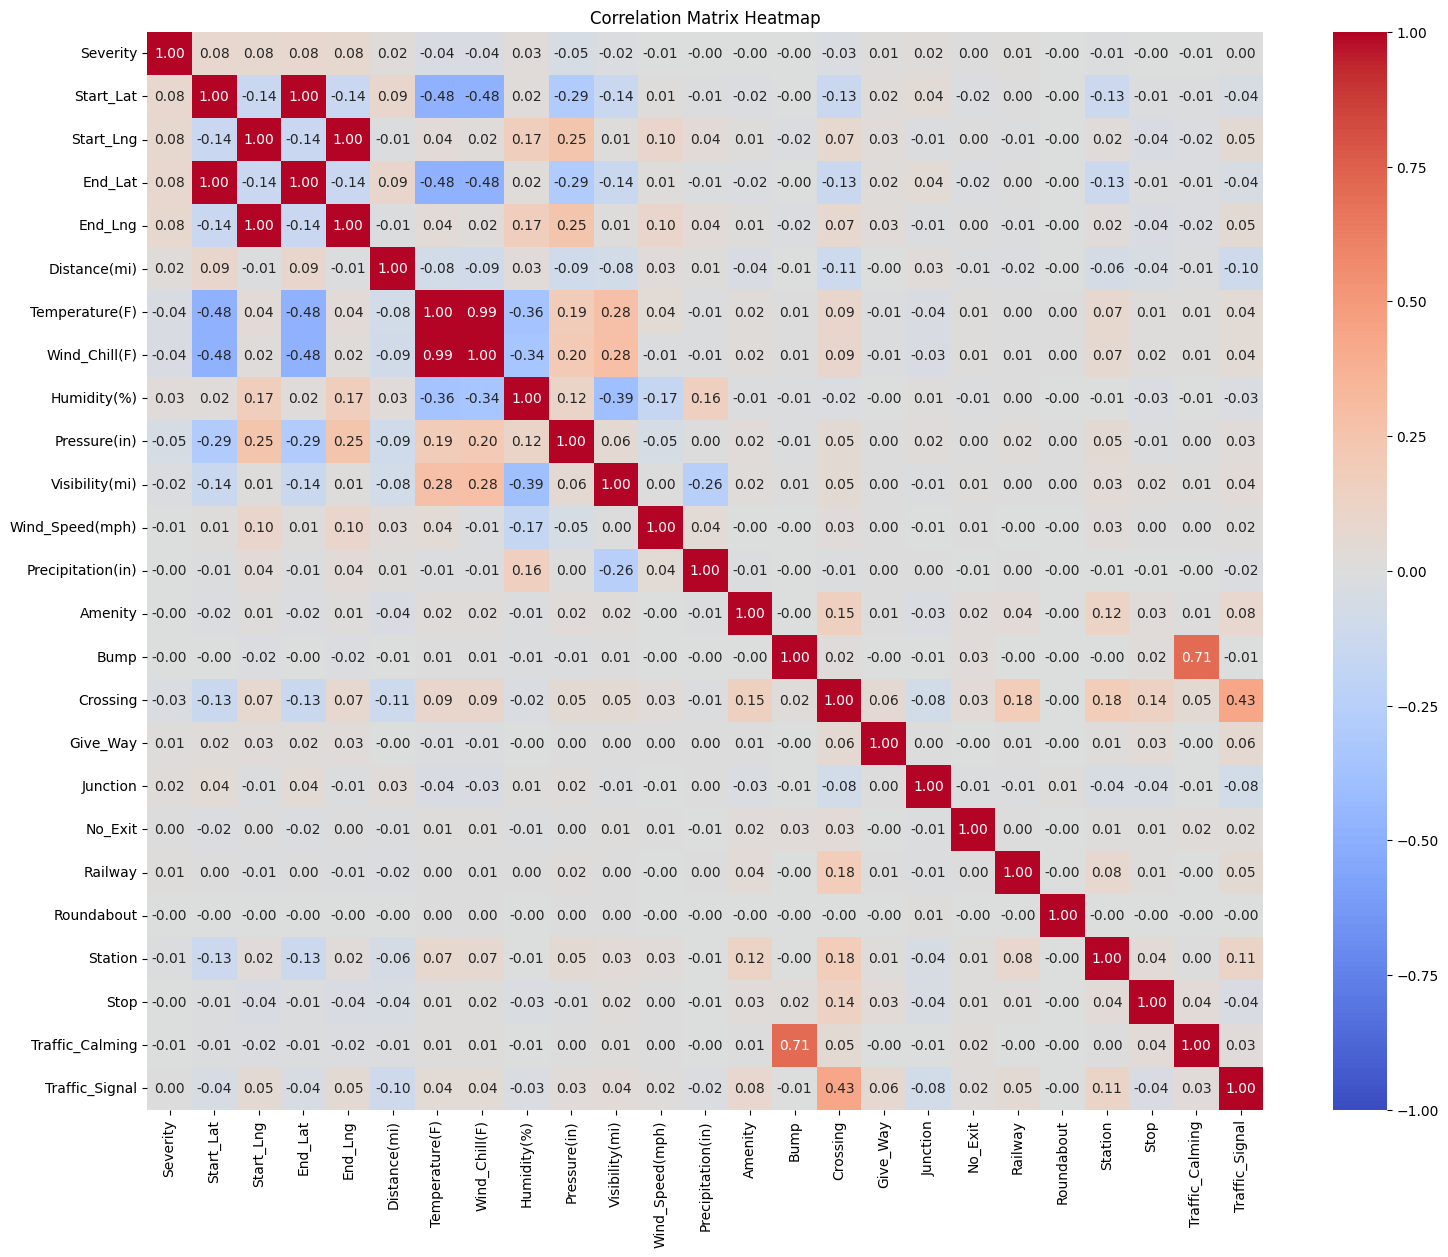

In [62]:
selected_columns = [
    'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
    'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump',
    'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
    'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal'
]
heatmap_df = pandas_df[selected_columns]

boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
heatmap_df[boolean_columns] = heatmap_df[boolean_columns].astype(int)
heatmap_df = heatmap_df.dropna()

correlation_matrix = heatmap_df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

This heatmap is very insightful. These are the key takeaways:
- `Temperature` and `Wind_Chill` have a very high correlation. As a result, in the data preprocessing stage we will only use one of these two variables to capture the information.
- `Start_Lat` is very strongly correlated with `End_Lat`. Since we earlier noticed that `End_Lat` has a lot of missing values, we will proceed only with the `Start_Lat` variable.
- Similarly, `Start_Lng` is very strongly correlated with `End_Lng`. Since we earlier noticed that `End_Lng` has a lot of missing values, we will proceed only with the `Start_Lng` variable.
- `Traffic_Calming` is associated with `Bump` and `Traffic Signal` is associated with `Crossing`.
- In general, the POI annotations have a lesser correlation with severity than the weather conditions. We will want to keep this in mind when choosing features for model training.

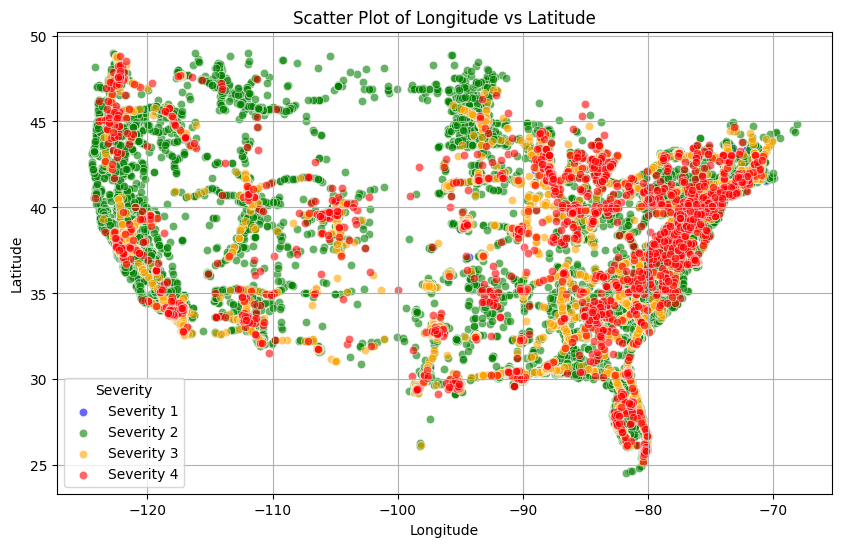

In [67]:
severity_colors = {1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}

plt.figure(figsize=(10, 6))
for severity in severity_colors:
    subset = pandas_df[pandas_df['Severity'] == severity]
    plt.scatter(subset['Start_Lng'], subset['Start_Lat'],
                c=severity_colors[severity], label=f'Severity {severity}',
                alpha=0.6, edgecolors='w', linewidth=0.5)

plt.title('Scatter Plot of Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.legend(title='Severity')
plt.show()

As expected, this scatterplot forms an outline of the US. Place inland are less populated and seem to have fewer accidents. This gives us a very strong visual representation of the association of the latitude and longitude with severity of accident.

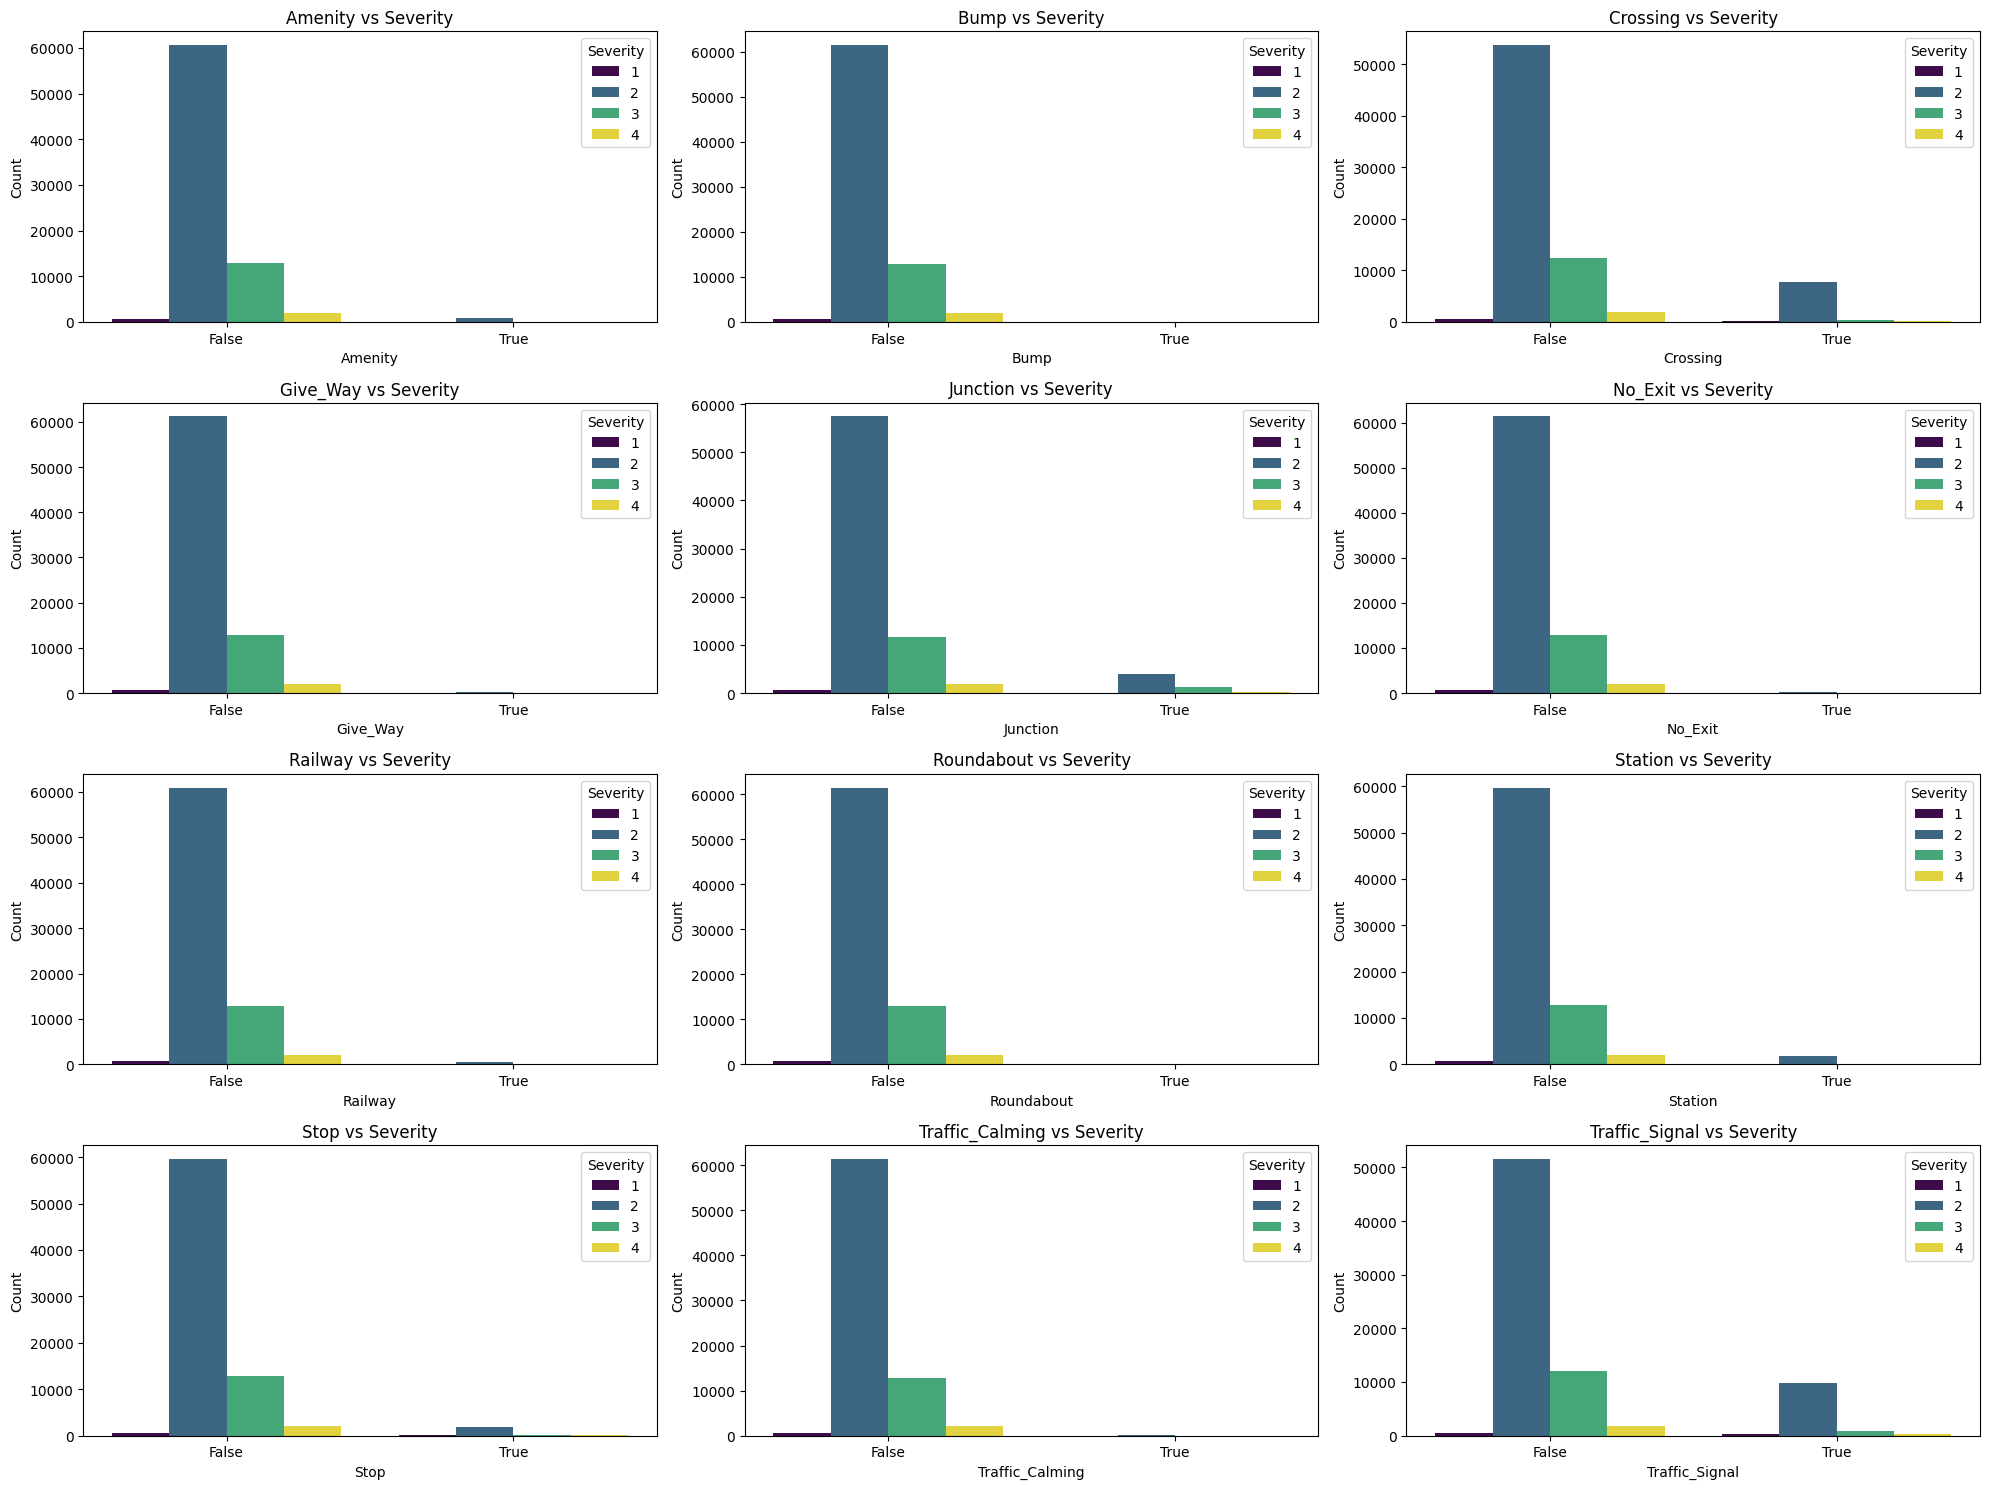

In [68]:
poi_columns = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal'
]

plt.figure(figsize=(20, 15))
for i, column in enumerate(poi_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=column, hue='Severity', data=pandas_df, palette='viridis')
    plt.title(f'{column} vs Severity')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Severity')

plt.tight_layout()
plt.show()

<ipython-input-72-5145bc187293>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=column, data=weather_df, palette='viridis')
<ipython-input-72-5145bc187293>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=column, data=weather_df, palette='viridis')
<ipython-input-72-5145bc187293>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=column, data=weather_df, palette='viridis')
<ipython-input-72-5145bc187293>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

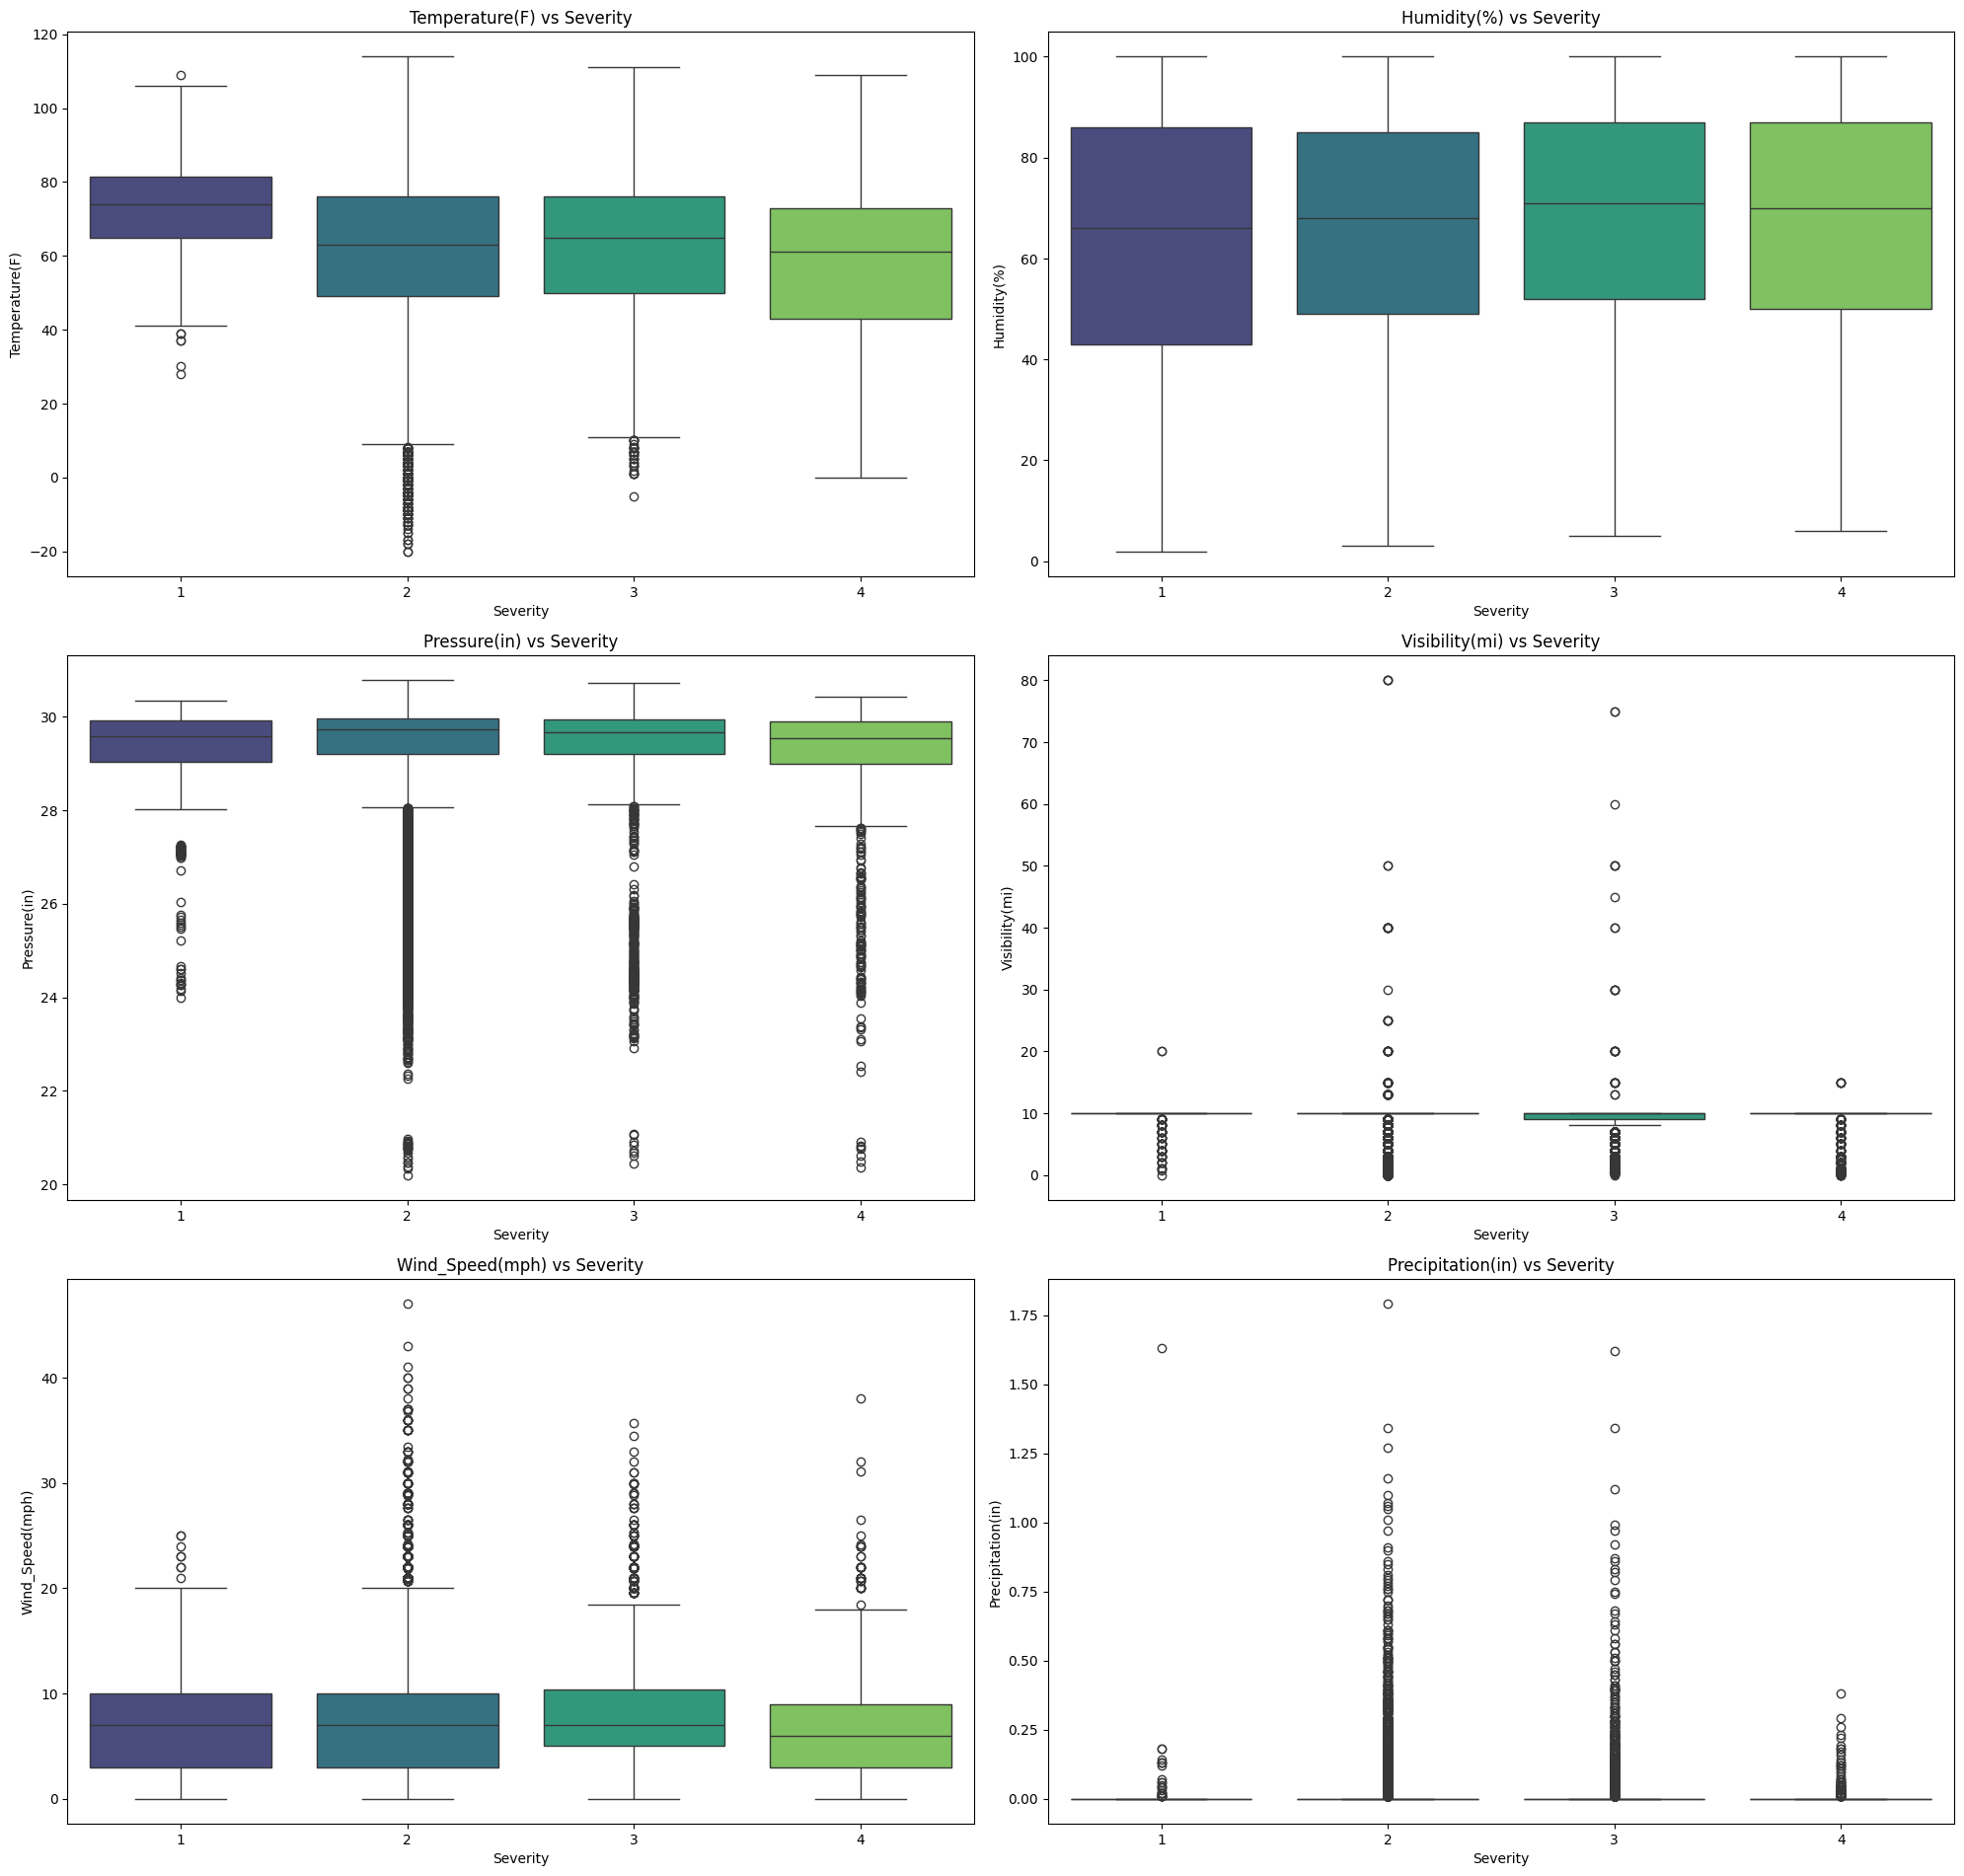

In [72]:
weather_columns = [
    'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
    'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

weather_df = pandas_df[['Severity'] + weather_columns].dropna()

plt.figure(figsize=(20, 25))
for i, column in enumerate(weather_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Severity', y=column, data=weather_df, palette='viridis')
    plt.title(f'{column} vs Severity')
    plt.xlabel('Severity')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


# Preprocessing

# Training

# Evaluation

# Results